# A Tale of Two Time Scales: Determining Integrated Volatility With Noisy High-Frequency Data

Suppose the dynamic of our prices $S_t = exp(X_t)$ follows an GBM process : 

$ dX_t = \mu_t d_t + \sigma_t dB_t $ that is : $X_t = X_0 + \int_{0}^T \mu_t dt + \int_{0}^T \sigma_t dWt$ 

When the function $\sigma$ is deterministic, $\int_{0}^T \sigma_t dWt$ is a Wiener process, ie a centered Normal law with variance $V=\int_{0}^T \sigma_t^2 dt$. This quantity is very important since it determines the shape of the volatility at a given interval [0,T]. This is a key quantity that we have to deal with during computation.

In the previous paper, we have :
$ S_{t+1}=S_t+\sqrt(\tau)\sigma\epsilon_t - \tau g(\frac{n}{\tau})$ 

This is equivalent to the continuous process :

$dS_t = \sigma dW_t -g(\frac{n}{\tau})dt $.

So the result on this paper remain exploitable for the Almgren-Chriss model

In [413]:
import pandas as pd
from dateutil.parser import parse
import scipy.optimize as opt

df_AAPL=pd.ExcelFile("databbg_electr.xlsx")

In [364]:
print(df_AAPL.sheet_names)

['Feuil1', 'Feuil2', 'Feuil3', 'FB US Equity', 'GOOGL US Equity', 'AMZN US Equity', 'Feuil7']


In [365]:
fb = df_AAPL.parse('FB US Equity')
fb = fb[14:1976][['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 14', 'Unnamed: 23']]
col = fb.iloc[0].values
col[-2] = "Bid"
col[-1] = "Ask"
fb.columns = col
fb = fb[2:]
fb = fb.set_index('Dates')

In [366]:
import numpy as np
fb["Log Price"] = fb["Open"].map(np.log)
fb["Log Return"] = fb["Log Price"] - fb["Log Price"].shift(1)
fb = fb.drop(fb.index[0])

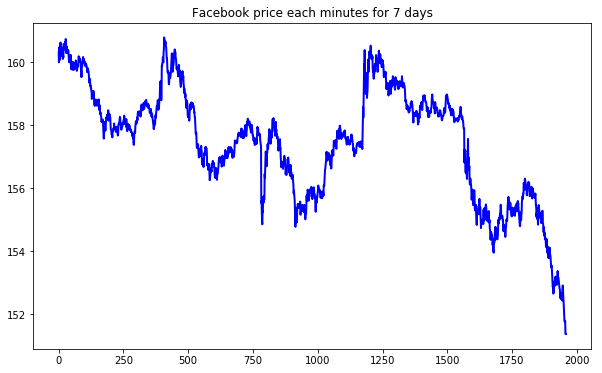

In [367]:
import matplotlib.pyplot as plt

X= fb.index
Y= fb["Open"]


plt.figure(figsize=(10,6))
plt.plot(range(len(Y)),Y,c='b',lw=2)
plt.title("Facebook price each minutes for 7 days")
plt.show()

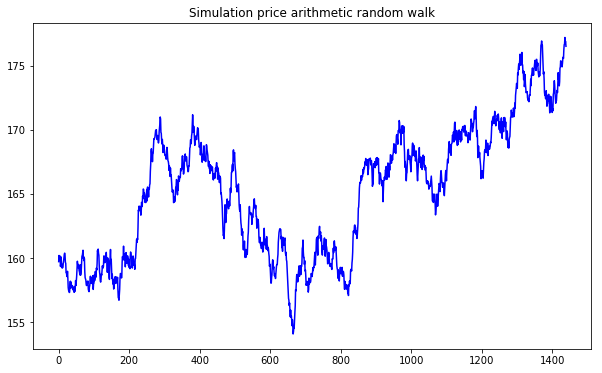

In [697]:
s = 160
price = []
import numpy as np
import matplotlib.pyplot as plt
sigma = 0.74
dt = 1/60*24
for i in range(60*24):
    s = s +  np.sqrt(dt)*sigma*np.random.randn(1)
    price.append(s)
plt.figure(figsize=(10,6))  
plt.plot(range(len(price)), price, c='b')
plt.title("Simulation price arithmetic random walk")
plt.show()

In [369]:
def first_method(df, display=True):
    f = df.copy()
    f["var"] = f["Log Return"].apply(lambda x: x**2).cumsum()
    estimator = f["var"][-1]
    if(display):
        plt.figure(figsize=(10,6))
        plt.plot(range(len(f)),f["var"], c='b')
        plt.title("Integrale of the variance through the time")
        plt.show()
    return estimator

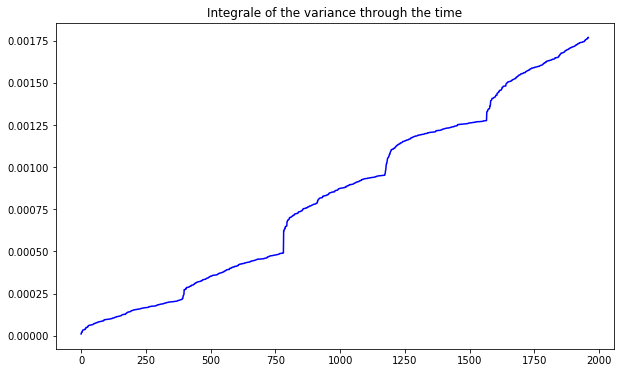

0.0017694136503163618

In [370]:
first_method(fb)

In [371]:
import matplotlib.patches as mpatches

def second_method(df):
    for k in [5,10,20,30,40]:
        f = df.copy()
        f = df.iloc[[i for i in range(len(f)) if i%k==0]]
        f["var"] = f["Log Return"].apply(lambda x: x**2).cumsum()
        plt.figure(figsize=(10,6))
        plt.plot(range(len(f)),f["var"], c='b')
        plt.title("Integrale of the variance through the time")
        red_patch = mpatches.Patch(color='b', label=str(k)+'min')
        plt.legend(handles=[red_patch])
    plt.show()
    return f

/Users/johnsibony/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


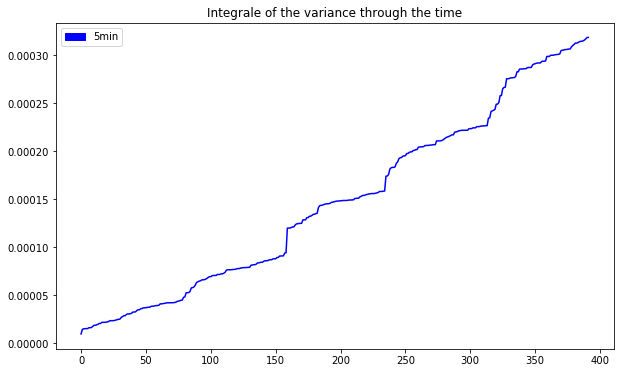

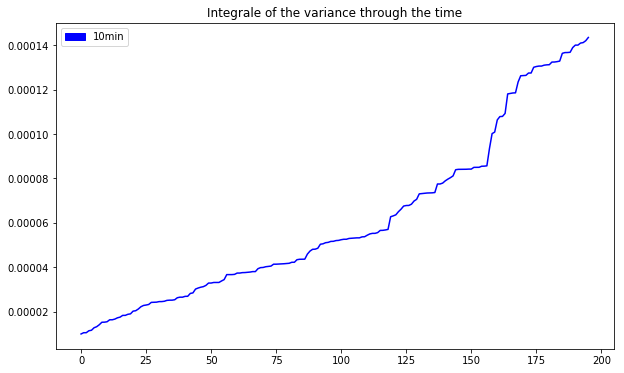

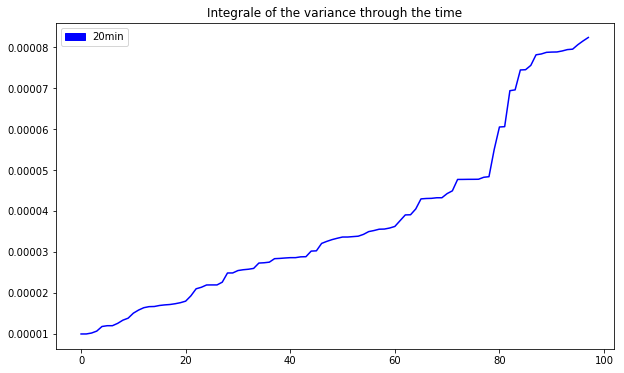

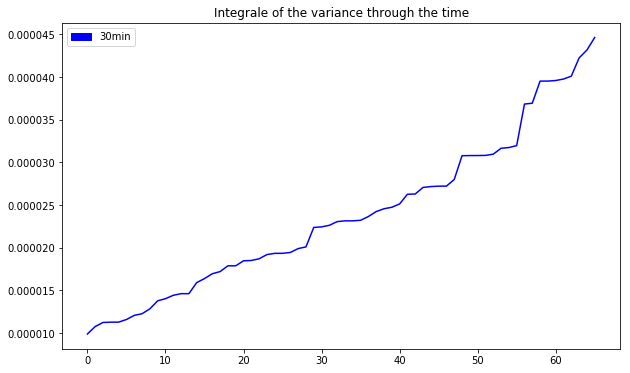

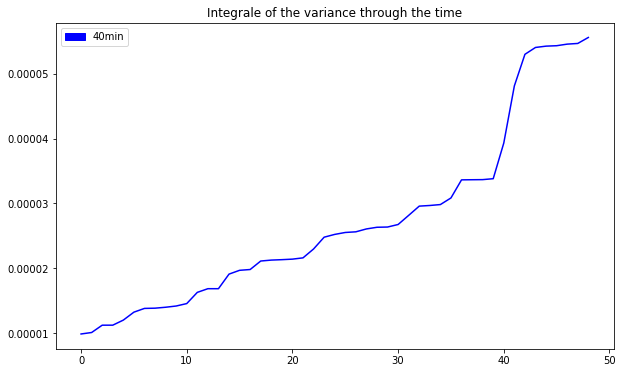

,Open,Close,High,Low,Value,Volume,Bid,Ask,Log Price,Log Return,var
Dates,,,,,,,,,,,
2018-10-04 15:32:00,160.315,160.01,160.449,159.89,29492420,184188,161.5,161.65,5.077141,-0.003145,0.000010
2018-10-04 16:12:00,160.02,160.02,160.07,159.95,24412918,152578,161.4,161.4,5.075299,-0.000475,0.000010
2018-10-04 16:52:00,160.01,160.06,160.089,160,4.94708e+06,30914,161.25,161.6,5.075236,-0.001062,0.000011
2018-10-04 17:32:00,159.43,159.47,159.52,159.42,3.34274e+06,20960,161.7,161.88,5.071605,-0.000063,0.000011
2018-10-04 18:12:00,158.36,158.4,158.45,158.34,4.1389e+06,26130,160.45,160.24,5.064871,-0.000884,0.000012
2018-10-04 18:52:00,158.09,157.89,158.09,157.89,6.43137e+06,40703,159.79,159.95,5.063164,-0.001106,0.000013
2018-10-04 19:32:00,157.98,157.97,157.985,157.88,3523361,22308,159.87,159.89,5.062468,-0.000759,0.000014
2018-10-04 20:12:00,157.82,157.788,157.84,157.78,1.59785e+06,10125,158.8,159.11,5.061455,0.000190,0.000014
2018-10-04 20:52:00,158.66,158.486,158.66,158.46,4.81045e+06,30347,158.17,158.2,5.066764,0.000378,0.000014


In [372]:
second_method(fb)

In [373]:
def fourth_method(df, K, display=True):
    
    n = len(df)
    estimator = 0
    for k in range(K):
        f_k = df.copy()  
        f_k = f_k.iloc[list(range(k,len(f_k), K))]
        f_k["var"] = f_k["Log Return"].apply(lambda x: x**2).cumsum()
        estimator = estimator + f_k["var"][-1]
        n = min(n, len(f_k))
        try :
            f = [f[i]+f_k["var"][i]/K for i in range(n)]
        except :
            f = [f_k["var"][i]/K for i in range(n)]
    if(display):
        plt.figure(figsize=(10,6))
        plt.plot(range(len(f)),f, c='b')
        plt.title("Integrale of the variance through the time")
        plt.show()
    
    return estimator / K

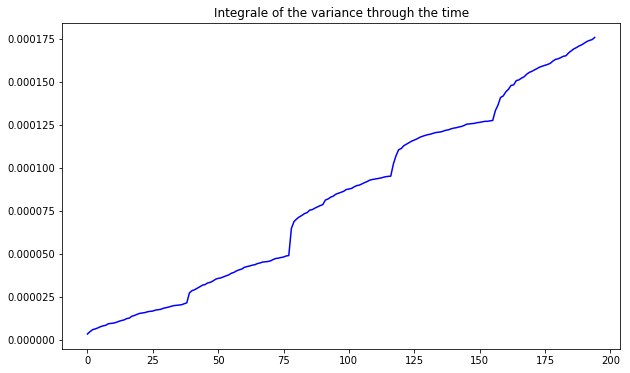

0.00017694136503163612

In [374]:
fourth_method(fb, 10)

In [375]:
def fifth_method(df, T, K, I, subgrid=False, adjusted=False):
    
    def fourth_method_subgrid(df, K): 
        estimator = 0
        for k in range(K):
            l = list(range(k,len(df), K))
            for i in range(I):
                f_k_i = df.copy()  
                f_k_i = f_k_i.iloc[[val for index,val in enumerate(l) if index%I==i]]
                estimator = estimator + np.sum(f_k_i["Log Return"].apply(lambda x: x**2))
        return estimator / (I+K)
    if(T==0):
        return 0
    else:
        f_t = df.iloc[list(range(0,T))]
        n = len(f_t)
        n_bar = (n-int(K)+1) / int(K)
        if(subgrid):
            average = fourth_method_subgrid(f_t, int(K/I))
        else : 
            average = fourth_method(f_t, int(K), display=False)
        estimator = average - (n_bar/np.float(n)) * first_method(f_t, False)
        if(adjusted):
            estimator = estimator/(1-n_bar/np.float(n))
        return estimator

def optimal_eta(df, I, M, K, T):
    
    n = len(df)
    def spread(df, I, M, K):
        spread = 0
        for m in range(1, M+1):
            spread_k1 = fifth_method(df, int(m*n/M), K, I, subgrid=False) - fifth_method(df, int((m-1)*n/M), K, I, subgrid=False)
            spread_k2 = fifth_method(df, int(m*n/M), K*I, I, subgrid=True) - fifth_method(df, int((m-1)*n/M), K*I, I, subgrid=True) 
            spread = spread + (spread_k1 - spread_k2)**2
            print(n**(1/3) * spread)
        return n**(1/3) * spread
    
    var_noise = first_method(df, False) / 2*len(df)
    c = K / n**(2/3)
    s = spread(df, I, M, K)
    eta = ( s - 8 * var_noise**2 * (1/c**2) * (1+ (1/I**2) - (1/I)) ) / (c * (np.sqrt(I) - 1)**2 * T)
    return eta, var_noise

def optimal_fifth_c(df, I=3, M=20, K=50, T=7):
    eta, var_noise = optimal_eta(df, I, M, K, T)
    c = (16 * var_noise**2 / T * eta) **(1/3)
    print(16 * var_noise**2 / T * eta)
    return c

In [73]:
c = optimal_fifth_c(fb)
print(c*len(fb)**(2/3)) # This optimal method does not work ! 

2.3691688549556875e-11
2.8567858181778467e-11
3.0591541428747634e-11
3.28885351466906e-11
6.259775669142904e-11
7.037849821911417e-11
7.452932897955779e-11
1.2709115725249126e-10
1.6662105168725596e-10
1.8048811325717317e-10
1.8844346272182527e-10
1.920654363561562e-10
2.7088015343372246e-10
2.7510649753130217e-10
2.7787488452173496e-10
2.8669896115026404e-10
3.567908694355382e-10
3.684127040388046e-10
3.8111485827919666e-10
3.963906263472216e-10
-1091.5140811537594
nan


/Users/johnsibony/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in double_scalars


In [283]:
fifth_method(fb, len(fb), 10, 2, adjusted=True)

9.103457958152574e-07

# Optimal execution using IS, TWAP and VWAP strategies for Facebook shares

In [409]:
# functions
# temporary market impact function
def h(n, tau, epsilon, eta):
    return epsilon*np.sign(n) + eta*(n/tau)

# permanent market impact function
def g(n, tau, alpha):
    """
    in the article it's gamma but to follow the ACDP equations given to us, 
    this gamma was replaced by alpha
    """
    return alpha*(n/tau) 
# change of variable: new equation
def H(q, n, gamma, sigma, tau,alpha,epsilon, eta):
    return (0.5*(gamma**2)*((q-n)**2)*(sigma**2)*tau + 
            gamma*n*h(n,tau,epsilon,eta) + 
            gamma*(q-n)*g(n,tau,alpha)*tau)



In [592]:
def efficient_frontier(X_total, V_total, S0, r, nb_T, tau, alpha, eta, epsilon, sigma, type_func, v):
    
    def optimization(type_func):
        """
        get Optimal trajectories
        """
        x_init  = np.ones((nb_T+1,1)) * X_total / nb_T # constant sell initialization
        bounds = [(0.0, X_total) for x in range(len(x_init))]
        constraints = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - X_total})


        optim = opt.minimize(objective_func(type_func), x_init, method='SLSQP', bounds=bounds, constraints=constraints) 
        q_opt = np.array(optim.x)

        return q_opt
    
    def Exp_IS(alpha, epsilon, eta, tau, q_opt, X_total):
        """
        IS Expectation
        """
        # with the linear costs model we have:
        exp_IS = 0.5*alpha*(X_total**2) + epsilon*np.sum(q_opt) + (eta - 0.5*alpha*tau)/tau * np.sum(q_opt**2)

        return exp_IS

    def Var_IS(tau, sigma, q_opt):
        """
        IS variance
        """
        
        return (tau* (sigma **2) * np.sum(np.cumsum(X_total - q_opt)**2))
        
    
    def Exp_VWAP(X_total, nb_T, V_total, S0, q_opt, alpha, epsilon, eta, tau ):
        """
        VWAP Expectation
        """

        #v = np.ones((nb_T,1)) * V_total / nb_T
        nbr_opt = len(q_opt)

        exp_vwap = 0
        for i in range(nbr_opt):
            sum_g_i = 0
            for j in range(i):
                sum_g_i += g(q_opt[j], tau, alpha)
            exp_vwap += (X_total*v[i]/V_total - q_opt[i])*(S0-sum_g_i*tau) - X_total*tau*v[i]*g(q_opt[i], tau, alpha)/V_total  + q_opt[i]*h(q_opt[i], tau, epsilon, eta)
        return exp_vwap

    def Var_VWAP(X_total, nb_T, S0, q_opt, tau, V_total):
        """
        VWAP variance
        """

        nbr_opt = len(q_opt)
        #v = np.ones((nb_T,1)) * V_total / nb_T
        var_vwap = 0
        for i in range(nbr_opt):
            sum_volum = 0
            for j in range(i,nbr_opt):
                sum_volum += v[j]
            #var_vwap = X_total - np.sum(q_opt[0:i]) 
            var_vwap+=(X_total/V_total * sum_volum - q_opt[i])**2 *tau*sigma**2


        return var_vwap

    def Exp_TWAP(X_total, nb_T, S0, q_opt, alpha, epsilon, eta, tau):
        """
        TWAP Expectation
        """
        
        T_total = tau*nb_T
        exp_twap = 0
        nbr_opt = len(q_opt)
        for i in range(nbr_opt):
            sum_g_i=0
            for j in range(i):
                sum_g_i += g(q_opt[j], tau, alpha)
            exp_twap += (X_total*tau/T_total - q_opt[i])*(S0-tau*sum_g_i) - (X_total/T_total) * (tau**2)*g(q_opt[i], tau, alpha) + q_opt[i]*h(q_opt[i], tau, epsilon, eta)
        return exp_twap

    def Var_TWAP( q_opt, tau, sigma, X_total):
        """
        TWAP variance
        """
        var_twap=0
        nbr_opt = len(q_opt)
        T_total = nbr_opt * tau
        for i in range(nbr_opt):
            sum_tau = 0
            for j in range(i,nbr_opt):
                sum_tau+=tau
            x = X_total - np.sum(q_opt[0:i])
            var_twap+=tau*(sigma**2)*((X_total/T_total * sum_tau-x)**2)
        return var_twap

    
    def objective_func(type_func):
        if type_func == 'VWAP':
            return objective_VWAP
        elif type_func == 'TWAP':
            return objective_TWAP
        elif type_func == 'IS':
            return objective_IS
        
    def objective_IS(q_opt):
        """
        Objective function for the IS
        """
        func = Exp_IS(alpha, epsilon, eta, tau, q_opt, X_total) + r * Var_IS(tau, sigma, q_opt)
        return func
    
    def objective_VWAP(q_opt):
        """
        Objective function for the VWAP
        """
        func = Exp_VWAP(X_total,nb_T, V_total, S0, q_opt, alpha, epsilon, eta, tau ) + r * Var_VWAP(X_total, nb_T, S0, q_opt, tau, V_total)
        return func
    
    def objective_TWAP(q_opt):
        """
        Objective function for the TWAP
        """
        func = Exp_TWAP(X_total, nb_T, S0, q_opt, alpha, epsilon, eta, tau) + r * Var_TWAP(q_opt,tau,sigma, X_total)
        return func
    
    def reorder(q_opt):
        """
        Reorder the inventory liquidation and get the increasing liquidation amount
        """
        return  np.cumsum(q_opt[::-1])[::-1]
    
    q_opt = optimization(type_func)
    list_opt = reorder(q_opt)
    
    if type_func == 'VWAP':
        res = list_opt, Exp_VWAP(X_total,nb_T, V_total, S0, q_opt, alpha,
                                 epsilon, eta, tau), Var_VWAP(X_total, nb_T, S0, 
                                                              q_opt, tau, V_total)
    
    elif type_func == 'TWAP':
        res = list_opt, Exp_TWAP(X_total, nb_T, S0, q_opt, alpha, 
                                 epsilon, eta, tau), Var_TWAP( q_opt, tau, sigma, X_total)
    
    elif type_func == 'IS':
        res = list_opt, Exp_IS(r, epsilon, eta, tau, q_opt, 
                               X_total), Var_IS(tau, sigma, q_opt)
    

    return res    
        

In [593]:
def compare_risk_av(risks, X_total,V_total, S0, nb_T, 
                                 tau, alpha, eta, epsilon, sigma,bench_type):
    
    """
    Plotting various optimal trajectories with different risk aversion
    """
    
    q_opts = []
    # in case they are not sent in an increasing order: sort them
    risks.sort()
    for r in risks:
        temp = efficient_frontier(X_total,V_total, S0, r, nb_T, 
                                 tau, alpha, eta, epsilon,sigma,bench_type)
        
        q_opts.append(temp[0])


    # Plotting
    plt.figure()
    plt.plot(q_opts[0], label = 'risk aversion: ' + str(risks[0]))
    plt.plot(q_opts[1], label = 'risk aversion: ' + str(risks[1]))
    plt.plot(q_opts[2], label = 'risk aversion: ' + str(risks[2]))
    plt.plot(q_opts[3], label = 'risk aversion: ' + str(risks[3]))
    plt.plot(q_opts[4], label = 'risk aversion: ' + str(risks[4]))
    plt.grid(True)
    plt.title('Optimal trajectories with '+ bench_type)
    plt.xlabel('Trading periods')
    plt.ylabel('Remaining Inventory')
    plt.legend()
    plt.show()




For the VWAP strategie, we define the volume at each time step i : $Volume(i) = \sum_{t_{i-1}<n<t_i} Volume_{minute}(n)$

In [662]:
nb_T = 50
V_total = np.sum(fb[0:391]['Volume'])
vol = 0
v = []
for i in range(len(fb[0:391])):
    vol = vol + fb[0:391]['Volume'][i]
    if(i%int(len(fb[0:391])/nb_T )):
        v.append(vol)
        vol = 0
print(np.sum(v)==V_total)

True


In [727]:
X_total= 70000
spread = (fb['Ask'][0] - fb['Bid'][0])/fb['Ask'][0]
alpha = spread / (0.1*V_total)
sigma = fb[0:391]["Open"][0]*np.sqrt(fourth_method(fb[0:391], 10, display=False))
tau= 1/50
r = 2.0*10**(-3)
epsilon = 0.0625
eta= spread / (0.01*V_total)
S0 = fb["Open"][0]

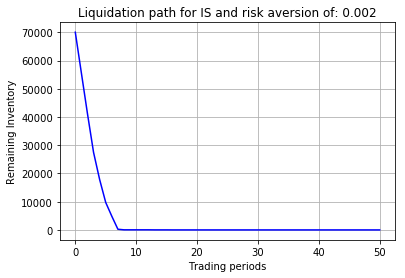

In [728]:
type_func = 'IS'
EF_VWAP = efficient_frontier(X_total,V_total, S0, r, nb_T, 
                                 tau, alpha, eta, epsilon, sigma, type_func, v)
plt.figure()
plt.plot(EF_VWAP[0], 'b')
plt.grid(True)
plt.xlabel('Trading periods')
plt.ylabel('Remaining Inventory')
plt.title("Liquidation path for " + type_func +" and risk aversion of: " +str(r))
plt.show()

n_is = [EF_VWAP[0][i]-EF_VWAP[0][i+1] for i in range(len(EF_VWAP[0])-1)]

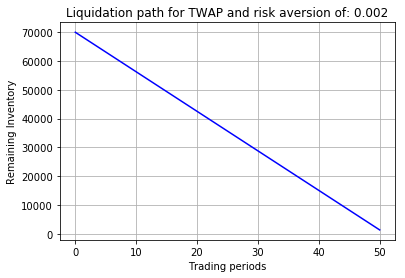

In [729]:
type_func = 'TWAP'
EF_VWAP = efficient_frontier(X_total,V_total, S0, r, nb_T, 
                                 tau, alpha, eta, epsilon, sigma, type_func, v)
plt.figure()
plt.plot(EF_VWAP[0], 'b')
plt.grid(True)
plt.xlabel('Trading periods')
plt.ylabel('Remaining Inventory')
plt.title("Liquidation path for " + type_func +" and risk aversion of: " +str(r))
plt.show()

n_twap = [EF_VWAP[0][i]-EF_VWAP[0][i+1] for i in range(len(EF_VWAP[0])-1)]

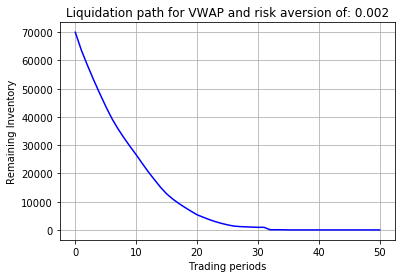

In [730]:
type_func = 'VWAP'
EF_VWAP = efficient_frontier(X_total,V_total, S0, r, nb_T, 
                                 tau, alpha, eta, epsilon, sigma, type_func, v)
plt.figure()
plt.plot(EF_VWAP[0], 'b')
plt.grid(True)
plt.xlabel('Trading periods')
plt.ylabel('Remaining Inventory')
plt.title("Liquidation path for " + type_func +" and risk aversion of: " +str(r))
plt.show()

n_vwap = [EF_VWAP[0][i]-EF_VWAP[0][i+1] for i in range(len(EF_VWAP[0])-1)]

In [731]:
def price_simulation(S0, nb_T, sigma, tau, alpha, eta, epsilon):
    s_is, s_twap, s_vwap = S0, S0, S0
    cash_is = []
    cash_twap = []
    cash_vwap = []
    dt = 1/nb_T
    for i in range(nb_T):
        c_is = s_is - h(n_is[i], tau, epsilon, eta)
        s_is = s_is +  np.sqrt(dt)*sigma*np.random.randn(1) - tau * g(n_is[i], tau, alpha)
        cash_is.append(c_is)
        
        c_twap = s_twap - h(n_twap[i], tau, epsilon, eta)
        s_twap = s_twap +  np.sqrt(dt)*sigma*np.random.randn(1) - tau * g(n_twap[i], tau, alpha)
        cash_twap.append(c_twap)
        
        c_vwap = s_vwap - h(n_vwap[i], tau, epsilon, eta)
        s_vwap = s_vwap +  np.sqrt(dt)*sigma*np.random.randn(1) - tau * g(n_vwap[i], tau, alpha)
        cash_vwap.append(c_vwap)
        
    return np.dot(cash_is,n_is), np.dot(cash_twap,n_twap), np.dot(cash_vwap,n_vwap)

In [732]:
IS = []
TWAP = []
VWAP = []
best_strat = {'IS':0, 'TWAP':0, 'VWAP':0}
for i in range(10000):   
    PL_is, PL_twap, PL_vwap = price_simulation(S0, nb_T, sigma, tau, alpha, eta, epsilon)
    if(PL_is> PL_twap and  PL_is>PL_vwap):
        best_strat['IS'] = best_strat['IS'] + 1
    elif(PL_twap> PL_is and  PL_is>vwap):
        best_strat['TWAP'] = best_strat['TWAP'] + 1
    else:
        best_strat['VWAP'] = best_strat['VWAP'] + 1
    
    IS.append(PL_is)
    TWAP.append(PL_twap)
    VWAP.append(PL_vwap)

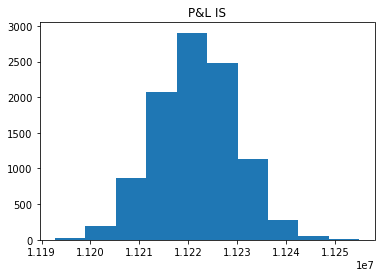

In [733]:
plt.hist(IS)
plt.title("P&L IS")
plt.show()

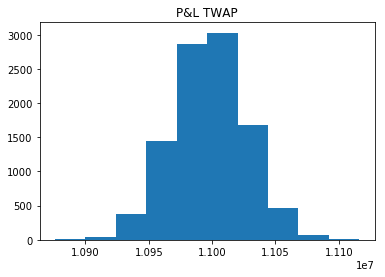

In [734]:
plt.hist(TWAP)
plt.title("P&L TWAP")
plt.show()

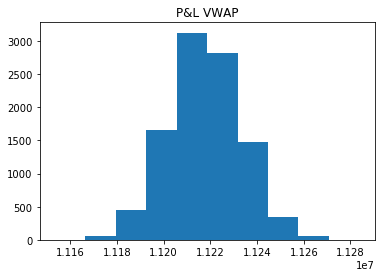

In [735]:
plt.hist(VWAP)
plt.title("P&L VWAP")
plt.show()

In [736]:
best_strat

{'IS': 5915, 'TWAP': 0, 'VWAP': 4085}